In [36]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.patches import ConnectionPatch
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("C:/Users/ThinkPad/Desktop/Datasets/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [38]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [39]:
df.shape

(607, 11)

In [40]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [41]:
#EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

In [42]:
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [43]:
df.work_year.unique()

array([2020, 2021, 2022], dtype=int64)

In [44]:
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [45]:
company_location_count = df['company_location'].value_counts(ascending=False)
company_location_count.head(10)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64

In [46]:
df1 = df

In [47]:
counts = df1['company_location'].value_counts()

df2 = df1[~df1['company_location'].isin(counts[counts < 6].index)]

In [48]:
df2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [49]:
df2.company_location.unique()

array(['DE', 'JP', 'GB', 'US', 'FR', 'IN', 'GR', 'CA', 'ES'], dtype=object)

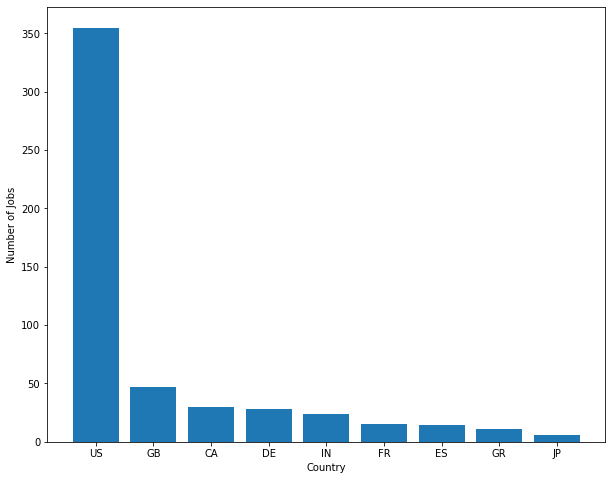

In [50]:
matplotlib.rcParams["figure.figsize"] = (10,8)
company = df2['company_location']    
count = company.value_counts()
plt.bar(count.index,count)
plt.xlabel("Country")
plt.ylabel("Number of Jobs")
plt.show()

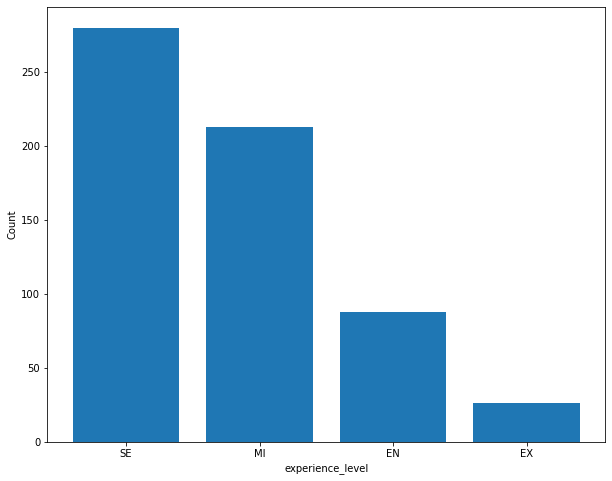

In [51]:
matplotlib.rcParams["figure.figsize"] = (10,8)
c = df['experience_level']    
count = c.value_counts()
plt.bar(count.index,count)
plt.xlabel("experience_level")
plt.ylabel("Count")
plt.show()

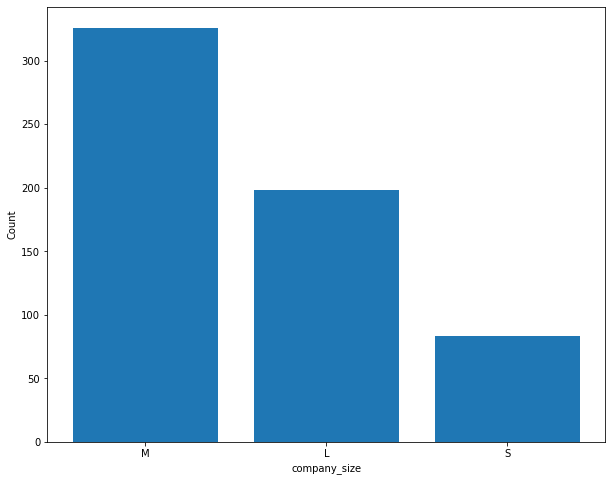

In [52]:
matplotlib.rcParams["figure.figsize"] = (10,8)
c = df['company_size']    
count = c.value_counts()
plt.bar(count.index,count)
plt.xlabel("company_size")
plt.ylabel("Count")
plt.show()

In [53]:
df3 = df[["experience_level","salary_in_usd"]].groupby(["experience_level"],as_index = False).mean().sort_values(by = "salary_in_usd",ascending = False)

In [54]:
df3

,experience_level,salary_in_usd
1,EX,199392.038462
3,SE,138617.292857
2,MI,87996.056338
0,EN,61643.318182


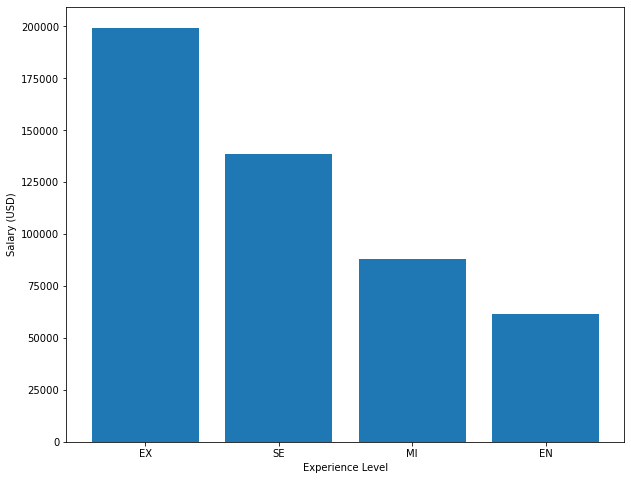

In [55]:
plt.bar(df3.experience_level,df3.salary_in_usd)
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

In [56]:
df4=df[["job_title","salary_in_usd"]].groupby(["job_title"],as_index = True).mean().sort_values(by = "salary_in_usd",ascending = False).reset_index()
df4

,job_title,salary_in_usd
0,Data Analytics Lead,405000.000000
1,Principal Data Engineer,328333.333333
2,Financial Data Analyst,275000.000000
3,Principal Data Scientist,215242.428571
4,Director of Data Science,195074.000000
5,Data Architect,177873.909091
6,Applied Data Scientist,175655.000000
7,Analytics Engineer,175000.000000
8,Data Specialist,165000.000000
9,Head of Data,160162.600000


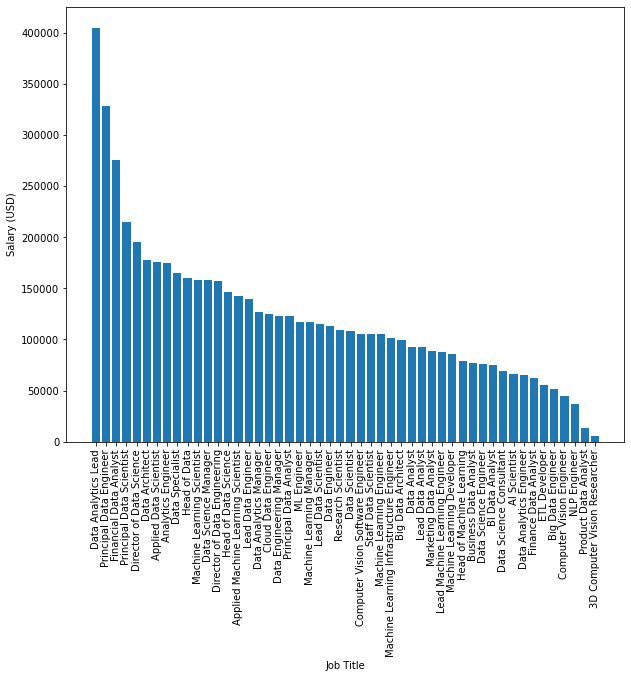

In [57]:
plt.bar(df4.job_title,df4.salary_in_usd)
plt.xticks(rotation = 90)
plt.xlabel("Job Title")
plt.ylabel("Salary (USD)")
plt.show()

In [58]:
df5=df[["experience_level","salary_in_usd"]].groupby(["experience_level"],as_index = True).mean().sort_values(by = "salary_in_usd",ascending = False).reset_index()
df5

,experience_level,salary_in_usd
0,EX,199392.038462
1,SE,138617.292857
2,MI,87996.056338
3,EN,61643.318182


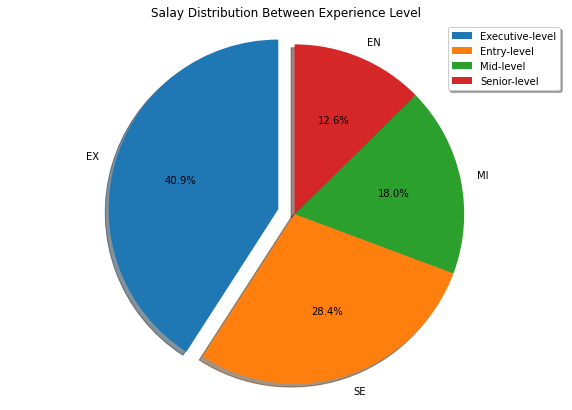

In [59]:
explode = (0.1, 0, 0, 0)  
fig1, ax1 = plt.subplots(figsize = (10,7))
ax1.pie(df5.salary_in_usd, explode=explode, labels=df5.experience_level, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(('Executive-level', 'Entry-level','Mid-level','Senior-level'), loc='upper right', shadow=True)
ax1.set_title("Salay Distribution Between Experience Level")
plt.show()

In [60]:
df6=df[["work_year","salary_in_usd"]].groupby(["work_year"],as_index = True).mean().sort_values(by = "salary_in_usd",ascending = False).reset_index()
df6

,work_year,salary_in_usd
0,2022,124522.006289
1,2021,99853.792627
2,2020,95813.000000


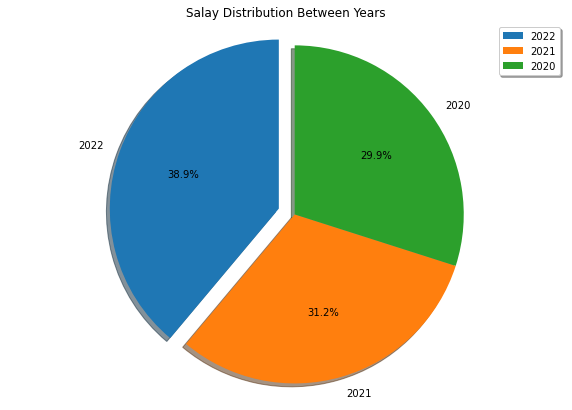

In [62]:
explode = (0.1, 0, 0)  
fig1, ax1 = plt.subplots(figsize = (10,7))
ax1.pie(df6.salary_in_usd, explode=explode, labels=df6.work_year, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(('2022', '2021','2020'), loc='upper right', shadow=True)
ax1.set_title("Salay Distribution Between Years")
plt.show()